In [2]:
import pandas as pd

In [3]:


# 文件路径
file_path = '/root/Download/AlgaeBloomForecast/NOAAdata.csv'

# 使用pandas的read_csv函数，设置chunksize参数
chunk_size = 10 ** 6  # 可以根据你的内存大小调整这个值
reader = pd.read_csv(file_path, chunksize=chunk_size)

# 读取第一块数据，它将包含表头信息
first_chunk = next(reader)

# 打印表头
print(first_chunk.columns)

/tmp/ipykernel_9859/126980794.py:9: DtypeWarning: Columns (8,10,11,12,13,15,16,17,20,21,23,24,25,26,28,29,30,31,32,34,37,38,39,40,41,42,43,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  first_chunk = next(reader)


Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'SOURCE', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'AA1', 'AA2',
       'AA3', 'AJ1', 'AW1', 'AY1', 'AY2', 'CALL_SIGN.1', 'CIG', 'DEW', 'ED1',
       'EQD', 'GA1', 'GA2', 'GA3', 'GA4', 'GE1', 'GF1', 'HL1', 'IA1', 'IA2',
       'KA1', 'KA2', 'MA1', 'MD1', 'ME1', 'MW1', 'MW2', 'MW3', 'MW4', 'OA1',
       'OC1', 'OD1', 'OD2', 'QUALITY_CONTROL.1', 'REM', 'REPORT_TYPE.1', 'SA1',
       'SLP', 'SOURCE.1', 'TMP', 'UA1', 'UG1', 'VIS', 'WND'],
      dtype='object')




| 表头           | 猜测含义                                   |
|----------------|-------------------------------------------|
| STATION        | 站点编号或名称                           |
| NAME           | 站点的全名                               |
| LATITUDE       | 纬度                                     |
| LONGITUDE      | 经度                                     |
| ELEVATION      | 海拔高度                                 |
| DATE           | 日期                                     |
| SOURCE         | 数据来源                                 |
| REPORT_TYPE    | 报告类型                                 |
| CALL_SIGN      | 呼叫信号或标识                          |
| QUALITY_CONTROL| 数据质量控制                             |
| AA1, AA2, AA3   | 可能与大气成分分析有关（如臭氧）       |
| AJ1            | 可能与降水量有关                         |
| AW1            | 可能与风速或风向有关                    |
| AY1, AY2       | 可能与日照时间或强度有关                |
| CIG            | 云高                                     |
| DEW            | 露点温度                                |
| ED1            | 可能与能见度有关                         |
| EQD            | 可能与等效温度有关                       |
| GA1, GA2, GA3, GA4 | 可能与地面温度有关                    |
| GE1            | 可能与地温有关                           |
| GF1            | 可能与地面风速或风向有关                |
| HL1            | 可能与高度有关                           |
| IA1, IA2       | 可能与冰雹有关                           |
| KA1, KA2       | 可能与降水量有关                         |
| MA1            | 可能与大气压力有关                       |
| MD1            | 可能与湿度有关                           |
| ME1            | 可能与蒸发量有关                         |
| MW1, MW2, MW3, MW4 | 可能与风速或风向有关                |
| OA1            | 可能与海洋分析有关                       |
| OC1            | 可能与海洋气候有关                       |
| OD1, OD2       | 可能与海洋深度或海洋数据有关            |
| QUALITY_CONTROL.1 | 另一种数据质量控制指标               |
| REM            | 可能与备注或额外信息有关                |
| REPORT_TYPE.1  | 另一种报告类型                           |
| SA1            | 可能与沙尘暴有关                         |
| SLP            | 海平面气压                               |
| SOURCE.1       | 另一种数据来源                           |
| TMP            | 温度                                     |
| UA1, UG1       | 可能与风速或风向有关                    |
| VIS            | 能见度                                   |
| WND            | 风向或风速                                |




这里我使用了extend方法来添加每个块中的站点到all_stations_list列表中。dropna()用于去除可能存在的任何NA值，而unique()则用于获取当前块中的唯一站点。最后，我们将列表转换为DataFrame，并去除重复项以获取唯一的站点列表。

In [9]:
import pandas as pd

# 文件路径
file_path = '/root/Download/AlgaeBloomForecast/NOAAdata.csv'

# 使用pandas的read_csv函数，设置chunksize参数
chunk_size = 10 ** 6  # 可以根据你的内存大小调整这个值
reader = pd.read_csv(file_path, chunksize=chunk_size)

# 初始化一个空的列表用于存储所有站点信息
all_stations_list = []

# 循环读取每个块
for chunk in reader:
    # 将当前块的'STATION'列数据添加到列表中
    all_stations_list.extend(chunk['STATION'].dropna().unique())

# 将列表转换为DataFrame
all_stations = pd.DataFrame(all_stations_list, columns=['STATION'])

# 去除重复项并获取唯一站点列表
unique_stations = all_stations['STATION'].drop_duplicates()

# 打印站点列表
print(unique_stations)

/tmp/ipykernel_9859/3269184790.py:14: DtypeWarning: Columns (8,10,11,12,13,15,16,17,20,21,23,24,25,26,28,29,30,31,32,34,37,38,39,40,41,42,43,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/tmp/ipykernel_9859/3269184790.py:14: DtypeWarning: Columns (8,12,13,14,17,20,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,42,43,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


0    58265099999
1    58367099999
2    58345099999
3    58259099999
4    58321199999
5    58457099999
7    54852599999
8    58238099999
9    58362099999
Name: STATION, dtype: int64


In [8]:
import pandas as pd

# 文件路径
file_path = '/root/Download/AlgaeBloomForecast/NOAAdata.csv'

# 使用pandas的read_csv函数，设置chunksize参数
chunk_size = 10 ** 6  # 可以根据你的内存大小调整这个值
reader = pd.read_csv(file_path, chunksize=chunk_size)

# 初始化一个空的列表用于存储所有站点的名称、经度和纬度
all_stations_info = []

# 循环读取每个块
for chunk in reader:
    # 遍历当前块中的每一行
    for _, row in chunk.iterrows():
        # 收集站点名称、经度和纬度信息
        station_info = {
            'STATION': row['STATION'],
            'LATITUDE': row['LATITUDE'],
            'LONGITUDE': row['LONGITUDE']
        }
        # 将信息添加到列表中
        all_stations_info.append(station_info)

# 将列表转换为DataFrame
all_stations_df = pd.DataFrame(all_stations_info)

# 去除重复项并获取唯一站点的经度和纬度列表
unique_stations_df = all_stations_df.drop_duplicates(subset=['STATION'])

# 打印站点列表及其经度和纬度
print(unique_stations_df[['STATION', 'LATITUDE', 'LONGITUDE']])

/tmp/ipykernel_9859/2434852065.py:14: DtypeWarning: Columns (8,10,11,12,13,15,16,17,20,21,23,24,25,26,28,29,30,31,32,34,37,38,39,40,41,42,43,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:
/tmp/ipykernel_9859/2434852065.py:14: DtypeWarning: Columns (8,12,13,14,17,20,22,23,24,25,26,27,28,29,30,32,35,37,38,40,41,42,43,47,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in reader:


             STATION   LATITUDE   LONGITUDE
0        58265099999  32.066667  121.600000
69465    58367099999  31.197875  121.336319
412256   58345099999  31.433333  119.483333
479176   58259099999  32.100000  120.867000
479377   58321199999  31.143378  121.805214
784250   58457099999  30.228333  120.431667
1154308  54852599999  32.020000  120.850000
1154351  58238099999  31.742042  118.862025
1392857  58362099999  31.400000  121.466667


/tmp/ipykernel_9859/3188194357.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  china = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ERROR 1: PROJ: proj_create_from_database: Open of /root/.conda/envs/hydro/envs/algae/share/proj failed
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31449 (\

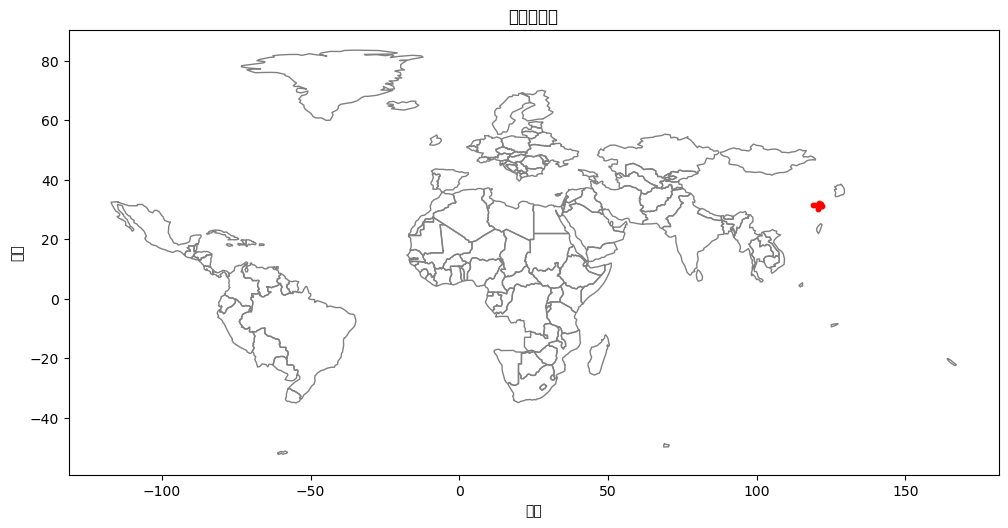

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# 你的站点数据
data = {
    'STATION': ['58265099999', '58367099999', '58345099999', '58259099999', 
                '58321199999', '58457099999', '54852599999', '58238099999', '58362099999'],
    'LATITUDE': [32.066667, 31.197875, 31.433333, 32.100000, 31.143378, 30.228333, 32.020000, 31.742042, 31.400000],
    'LONGITUDE': [121.600000, 121.336319, 119.483333, 120.867000, 121.805214, 120.431667, 120.850000, 118.862025, 121.466667]
}
df = pd.DataFrame(data)

# 将经纬度转换为Point对象
df['geometry'] = df.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# 读取一个基本的世界地图，这里使用中国的地图
china = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 仅保留中国地图的陆地部分
china = china[china['geometry'].type == 'Polygon']

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
china.boundary.plot(ax=ax, color='gray', linewidth=1)

# 绘制站点
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# 设置标题和坐标轴标签
ax.set_title('站点位置图')
ax.set_xlabel('经度')
ax.set_ylabel('纬度')

# 显示地图
plt.show()

/tmp/ipykernel_9859/826563134.py:22: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  china = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32428 (\N{CJK UNIFIED IDEOGRAPH-7EAC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.conda/envs/hydro/envs/algae/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25918 (\N{CJK UNIFIED IDEOGRAPH-653E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/roo

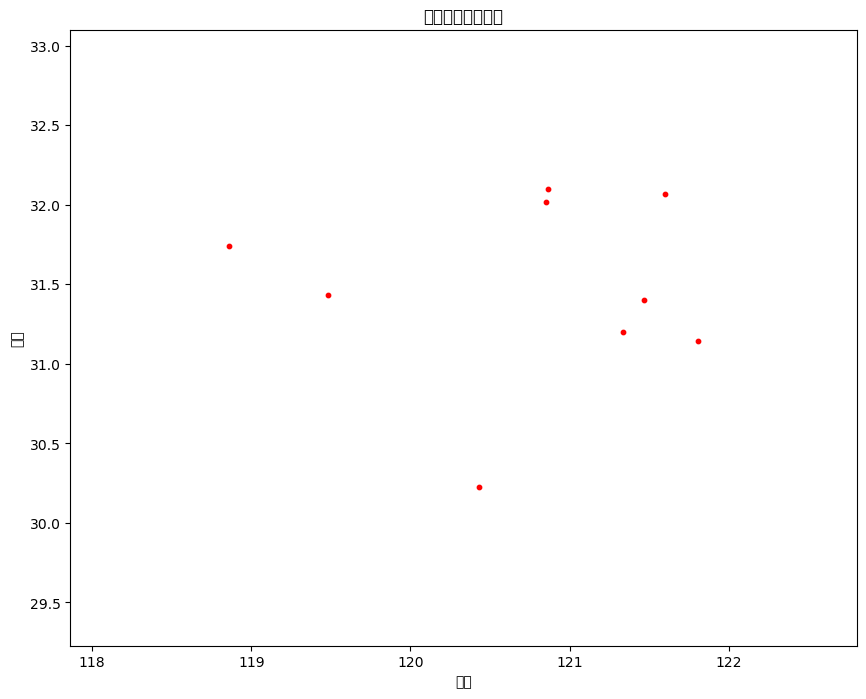

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# 你的站点数据
data = {
    'STATION': ['58265099999', '58367099999', '58345099999', '58259099999', 
                '58321199999', '58457099999', '54852599999', '58238099999', '58362099999'],
    'LATITUDE': [32.066667, 31.197875, 31.433333, 32.100000, 31.143378, 30.228333, 32.020000, 31.742042, 31.400000],
    'LONGITUDE': [121.600000, 121.336319, 119.483333, 120.867000, 121.805214, 120.431667, 120.850000, 118.862025, 121.466667]
}
df = pd.DataFrame(data)

# 将经纬度转换为Point对象
df['geometry'] = df.apply(lambda x: Point(x['LONGITUDE'], x['LATITUDE']), axis=1)

# 创建GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# 读取地图数据
china = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = china[china['geometry'].type == 'Polygon']

# 确定放大区域的边界（这里以站点数据为例）
min_lon = min(df['LONGITUDE']) - 1  # 经度最小值减去1度
max_lon = max(df['LONGITUDE']) + 1  # 经度最大值加上1度
min_lat = min(df['LATITUDE']) - 1   # 纬度最小值减去1度
max_lat = max(df['LATITUDE']) + 1   # 纬度最大值加上1度

# 绘制地图，设置边界
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
china.boundary.plot(ax=ax, color='gray', linewidth=1)
ax.set_xlim(min_lon, max_lon)  # 设置经度轴的边界
ax.set_ylim(min_lat, max_lat)  # 设置纬度轴的边界

# 绘制站点
gdf.plot(ax=ax, marker='o', color='red', markersize=10)

# 设置标题和坐标轴标签
ax.set_title('放大的站点位置图')
ax.set_xlabel('经度')
ax.set_ylabel('纬度')

# 显示地图
plt.show()

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# 你的站点数据
data = {
    'STATION': ['58265099999', '58367099999', '58345099999', '58259099999', 
                '58321199999', '58457099999', '54852599999', '58238099999', '58362099999'],
    'LATITUDE': [32.066667, 31.197875, 31.433333, 32.100000, 31.143378, 30.228333, 32.020000, 31.742042, 31.400000],
    'LONGITUDE': [121.600000, 121.336319, 119.483333, 120.867000, 121.805214, 120.431667, 120.850000, 118.862025, 121.466667]
}
df = pd.DataFrame(data)

# 将经纬度转换为Point对象，并创建GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']))

# 设置坐标系，这里使用WGS 84坐标系（EPSG:4326）
gdf.set_crs(epsg=4326, inplace=True)

# 导出为Shapefile
gdf.to_file('站点坐标_带投影.shp')